In [0]:
# Import the useful libraries 
import numpy as np
import pandas as pd
import os
from random import randint
import matplotlib.pyplot as plt
from google.colab import files
import time

In [29]:
# Define R Matrix 

R = np.matrix([[0, 0, np.nan, np.nan, 0, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan],
                [0, 0, 0, np.nan, 0, 0, np.nan, np.nan, np.nan, np.nan, np.nan],
                [np.nan, 0, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, np.nan, 100, np.nan, np.nan, np.nan, np.nan],
                [0, 0, np.nan, np.nan, 0, 0, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, 0, np.nan, np.nan, 0, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, 0, 0, np.nan, 0, 100, 0, np.nan, np.nan, np.nan],
                [np.nan, np.nan, np.nan, np.nan, np.nan, 0, 100, 0, np.nan, np.nan, 0],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, np.nan],
                [np.nan, np.nan, np.nan, np.nan, 0, np.nan, np.nan, np.nan, 0, 0, 0],
                [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 0, np.nan, 0, 0]])

print(R)

[[  0.   0.  nan  nan   0.  nan  nan  nan  nan  nan  nan]
 [  0.   0.   0.  nan   0.   0.  nan  nan  nan  nan  nan]
 [ nan   0.   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [ nan  nan   0.   0.  nan  nan 100.  nan  nan  nan  nan]
 [  0.   0.  nan  nan   0.   0.  nan  nan   0.   0.  nan]
 [ nan   0.  nan  nan   0.   0. 100.   0.  nan  nan  nan]
 [ nan  nan   0.   0.  nan   0. 100.   0.  nan  nan  nan]
 [ nan  nan  nan  nan  nan   0. 100.   0.  nan  nan   0.]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.  nan]
 [ nan  nan  nan  nan   0.  nan  nan  nan   0.   0.   0.]
 [ nan  nan  nan  nan  nan  nan  nan   0.  nan   0.   0.]]


In [30]:
# Initialise Q Matrix 
Q1 = np.matrix(np.zeros([11,11]))
Q2 = Q1

print(Q1)
print(Q2)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [0]:
def double_q_learning(alpha, gamma, epsilon, decay):
  
  # initialise current state in random
  current_state = randint(0, 10)
  
  # check available actions in the current state
  current_state_row = R[current_state,]
  av_act = np.where(current_state_row >= 0)[1]
  
  # if sum of Q-matrix is 0, select random, else follow epsilon greedy policy
  if (Q1[current_state,:] + Q2[current_state,:]).sum() == 0:
    action = np.random.choice(av_act, size=1)
  
  else:
    if np.random.uniform(0,1) < epsilon:
      action = np.random.choice(av_act, size=1)
    else:
      action = np.argmax(Q1[current_state,:] + Q2[current_state,:])
  
  # find max Q value after the first action
  next_state_row = R[action,]
  next_av_act = np.where(next_state_row >= 0)[1]
  
  if (Q1[action,:] + Q2[action,:]).sum() == 0:
    next_action_Q1 = np.random.choice(next_av_act, size=1)
    next_action_Q2 = np.random.choice(next_av_act, size=1)
  else:
    next_action_Q1 = np.argmax(Q1[action,:])
    next_action_Q2 = np.argmax(Q2[action,:])
  
  # update double Q-matrix:
  if np.random.random() > 0.5:
    Q1[current_state, action] = Q1[current_state, action] + alpha*(R[current_state, action] + gamma*Q2[action, next_action_Q2] - Q1[current_state, action])
  else:
    Q2[current_state, action] = Q2[current_state, action] + alpha*(R[current_state, action] + gamma*Q1[action, next_action_Q1] - Q2[current_state, action])
      
  return Q1, Q2, alpha, gamma, epsilon, decay

In [0]:
def evaluate(Q, episode, alpha, gamma, epsilon, decay):
  
  # initiate current state
#   current_state = randint(0,10)
  current_state = 8
  steps = [current_state]
  reward = 0
  
  # set rule if initiated from Station 7
  if current_state == 6:
    reward += np.max(Q[current_state, :])
    
  # step for start from other stations
  else:
    while current_state != 6:
      
      # check available actions, particular for early episode that Q value is 0 
      current_state_row = R[current_state, :]
      av_act = np.where(current_state_row >= 0)[1]
      
      # when Q-matrix is 0, select randomly from available actions
      if Q[current_state, av_act].sum() == 0:
        next_step = int(np.random.choice(av_act, size=1))
      
      else:
      # index for maximum value
        max_index = np.where(Q[current_state,:] == np.max(Q[current_state, av_act]))[1]

        if max_index.shape[0] > 1:
          next_step = int(np.random.choice(max_index, size = 1))
        else:
          next_step = int(max_index)
      
      # append next action and reward
      next_reward = np.max(Q[current_state, next_step])
      
      steps.append(next_step)
      reward += next_reward
      current_state = next_step
      
  
  average_reward.append((episode, alpha, gamma, epsilon, decay, reward/len(steps)))  
  step_cont.append((episode, alpha, gamma, epsilon, decay, len(steps)))
  
  return average_reward, step_cont

In [0]:
# Define initial parameters 
alphas = [0.9] # alpha is the learning rate
gammas = [0.8] # gamma is the discount factor 
epsilons = [0.9] # epsilon is the exploration factor
decays = [0.9999] # df is the decay factor for epsilon

In [34]:
for alpha in alphas:
  for gamma in gammas:
    for decay in decays:
      for epsilon in epsilons:
        print(alpha, gamma, epsilon, decay)

0.9 0.8 0.9 0.9999


In [35]:
average_reward = []
step_cont = []

start = time.time()

for alpha in alphas:
  for gamma in gammas:
    for decay in decays:
      for epsilon in epsilons:
        for episode in range(1000):

          Q1, Q2, alpha, gamma, epsilon, decay = double_q_learning(alpha, gamma, epsilon, decay)
          
          Q = Q1 + Q2
    
          if np.matrix.max(Q) > 0:
            Q_norm = (Q/np.matrix.max(Q)*100)
          else:
            Q_norm = Q

          average_reward, step_cont = evaluate(Q_norm, episode, alpha, gamma, epsilon, decay)
          
          epsilon *= decay
      
      # Reset the Q-matrix and epsilon to initial value
      Q1 = np.matrix(np.zeros([11,11]))
      Q2 = np.matrix(np.zeros([11,11]))
      epsilon = epsilon
          
end = time.time()
                  
print(Q_norm.astype(int))
# print(Q_norm.round(decimals=5))
# print(average_reward)
# print(step_cont)
print('Time used :', end-start, 'seconds')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in greater_equal
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in greater_equal


[[ 51  63   0   0  63   0   0   0   0   0   0]
 [ 50  63  79   0  63  79   0   0   0   0   0]
 [  0  63  79  79   0   0  99   0   0   0   0]
 [  0   0  79  79   0   0 100   0   0   0   0]
 [ 50  63   0   0  63  79   0   0  50  50   0]
 [  0  63   0   0  63  79  99  79   0   0   0]
 [  0   0  79  78   0  79  99  79   0   0   0]
 [  0   0   0   0   0  79  99  79   0   0  63]
 [  0   0   0   0  63   0   0   0  50  49   0]
 [  0   0   0   0  63   0   0   0  50  50  60]
 [  0   0   0   0   0   0   0  79   0  50  63]]
Time used : 0.5375761985778809 seconds


In [36]:
df_reward = pd.DataFrame.from_records(average_reward, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay', 'Average Reward Per Step'])
df_step = pd.DataFrame.from_records(step_cont, columns = ['episode', 'alpha', 'gamma', 'epsilon', 'decay','Steps'])

df = pd.merge(df_reward, df_step, on=['episode', 'alpha', 'gamma', 'epsilon', 'decay'])
print(df.shape)
df.head(5)

df.describe()

(1000, 7)


,episode,alpha,gamma,epsilon,decay,Average Reward Per Step,Steps
count,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000
mean,499.500000,9.000000e-01,8.000000e-01,0.856504,9.999000e-01,52.916082,5.765000
std,288.819436,1.510659e-14,1.132994e-14,0.024737,1.788353e-14,17.171135,7.610894
min,0.000000,9.000000e-01,8.000000e-01,0.814431,9.999000e-01,0.000000,4.000000
25%,249.750000,9.000000e-01,8.000000e-01,0.835029,9.999000e-01,56.279929,4.000000
50%,499.500000,9.000000e-01,8.000000e-01,0.856147,9.999000e-01,59.805263,4.000000
75%,749.250000,9.000000e-01,8.000000e-01,0.877800,9.999000e-01,60.571173,4.000000
max,999.000000,9.000000e-01,8.000000e-01,0.900000,9.999000e-01,60.995037,93.000000


In [37]:
df_stats_1 = df[['Average Reward Per Step', 'Steps']].round(decimals=1)
df_stats_1.describe().round(decimals=1)

,Average Reward Per Step,Steps
count,1000.0,1000.0
mean,52.9,5.8
std,17.2,7.6
min,0.0,4.0
25%,56.2,4.0
50%,59.8,4.0
75%,60.6,4.0
max,61.0,93.0


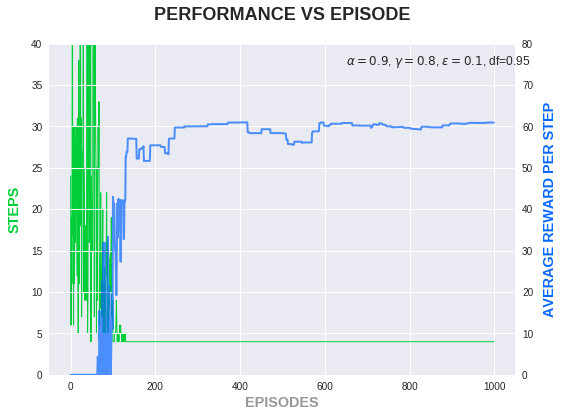

In [38]:
# Plot the performance chart

plt.style.use('seaborn')

fig, ax1 = plt.subplots()

fig.suptitle('PERFORMANCE VS EPISODE', fontsize=18, y=1.05, fontweight='bold')

ax2 = ax1.twinx()
ax1.plot(df['episode'], df['Steps'], color='#00CF38', linewidth=1, alpha=2)
ax2.plot(df['episode'], df['Average Reward Per Step'], color='#0767FF', linewidth=2, alpha=0.7)

ax1.set_ylim(0, 40)
ax2.set_ylim(0, 80)

ax1.set_xlabel('EPISODES', color='#979797', fontsize='large', fontweight='bold')
ax1.set_ylabel('STEPS', color='#00CF38', fontsize='large', fontweight='bold', labelpad=10)
ax2.set_ylabel('AVERAGE REWARD PER STEP', color='#0767FF', fontsize='large', fontweight='bold', labelpad=10)

plt.text(650, 75, r'$\alpha=0.9$, $\gamma=0.8$, $\epsilon=0.1$, df=0.95')

fig.tight_layout()
plt.show()